# **Lesson 05: Outlier**

In [ ]:
# Library
import os
import zipfile
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_name = 'AI Specialist Lesson 05.zip'
data_path = os.path.join(path, data_name)

os.mkdir('Lesson 05')
path_lesson = os.path.join('/content', 'Lesson 05')
os.chdir(path_lesson)

In [ ]:
with zipfile.ZipFile(data_path, 'r') as dataset_zipfile:
  dataset_zipfile.extractall(path_lesson)

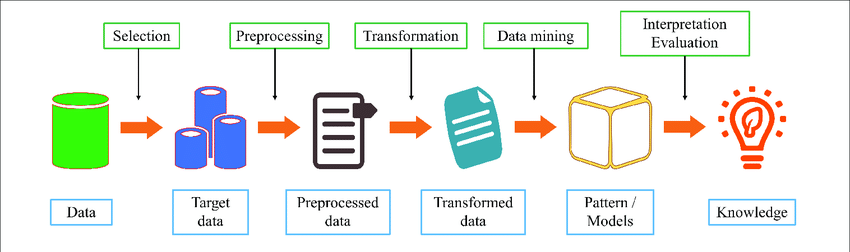

In [ ]:
display(Image(filename='AI Specialist Lesson 05/Data Mining Process 01.png'))

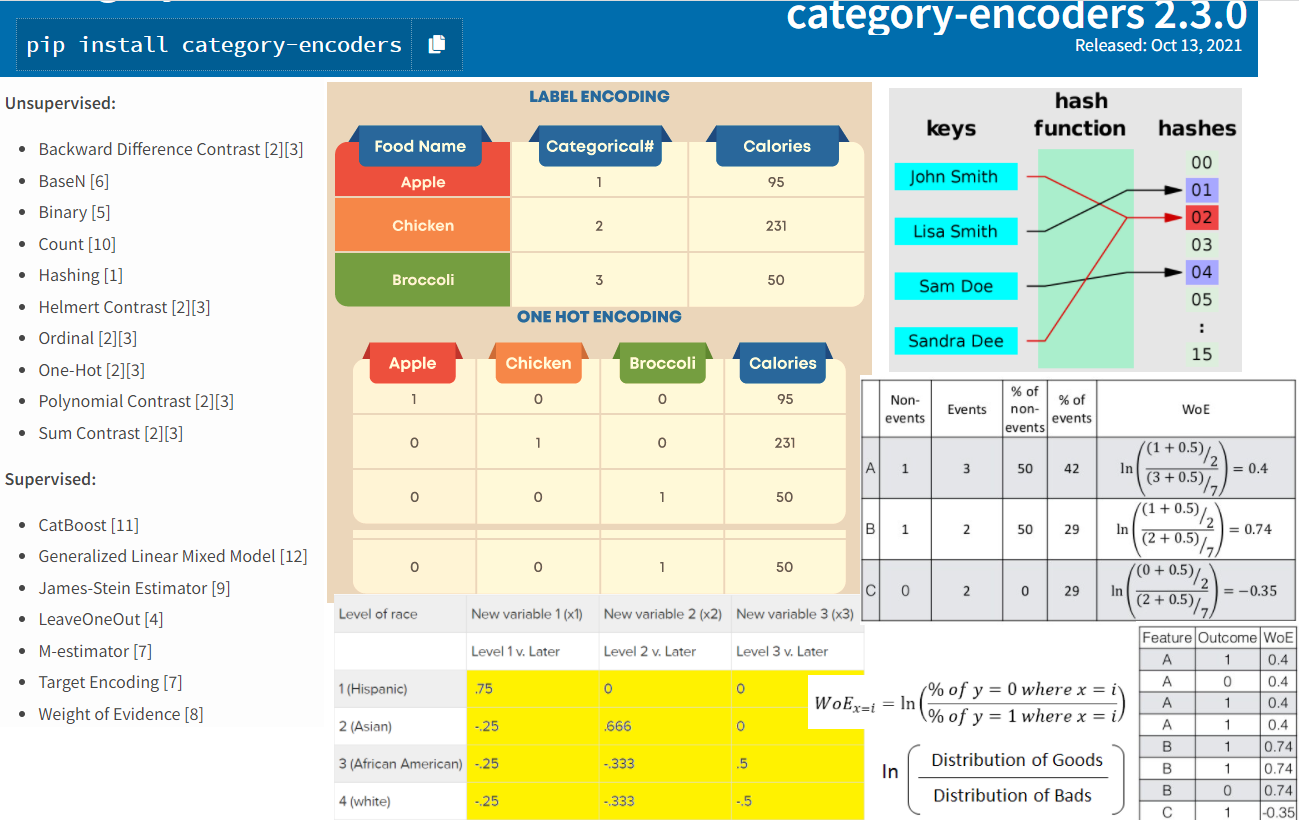

In [ ]:
display(Image(filename='AI Specialist Lesson 05/Feature Encoding.png'))

### **1. Read and Describe Data**

In [ ]:
# display all the columns
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('AI Specialist Lesson 05/TelecomCustomerChurn.csv')
print(data.shape)
display(data.head())

(4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
data.describe(include='number')

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### **2. EDA**

In [ ]:
Num_Cols = data.select_dtypes(include=['int64', 'float64']).columns
Cat_Cols = data.select_dtypes(include=['object']).columns

print(Num_Cols)
print(Cat_Cols)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


##### **2.1 Visualize Numerical Data**

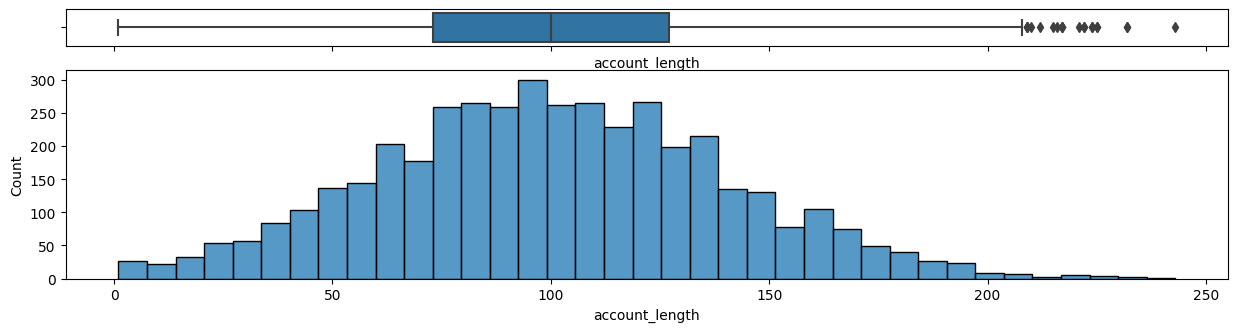

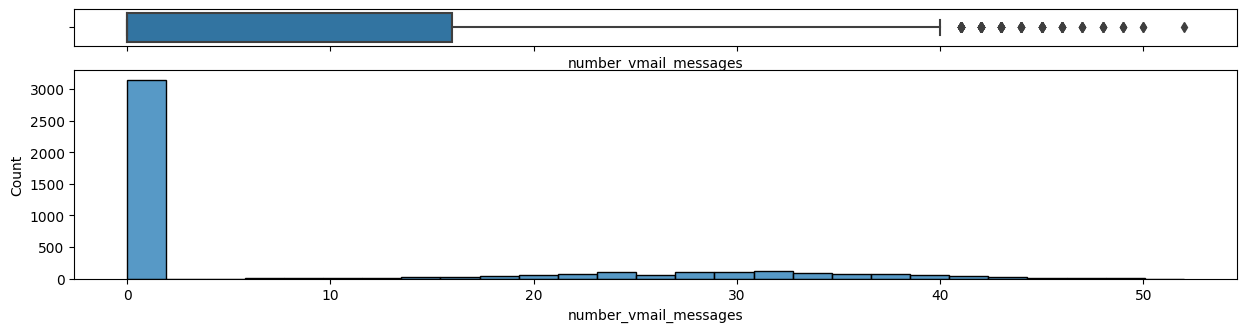

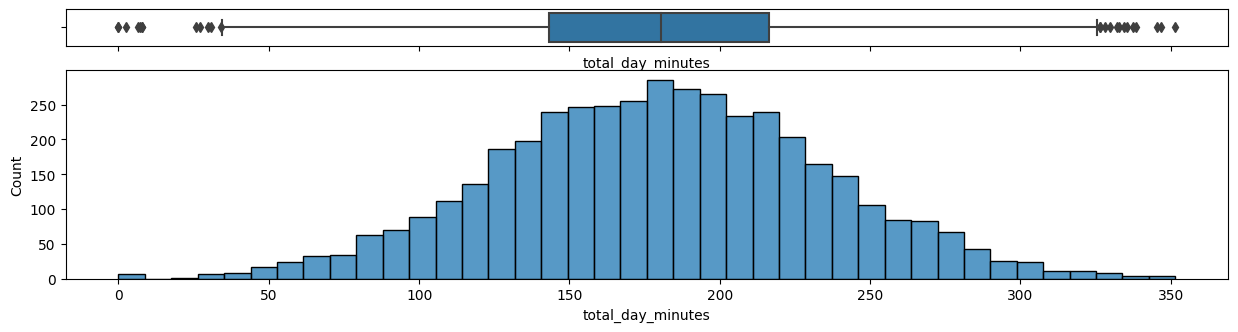

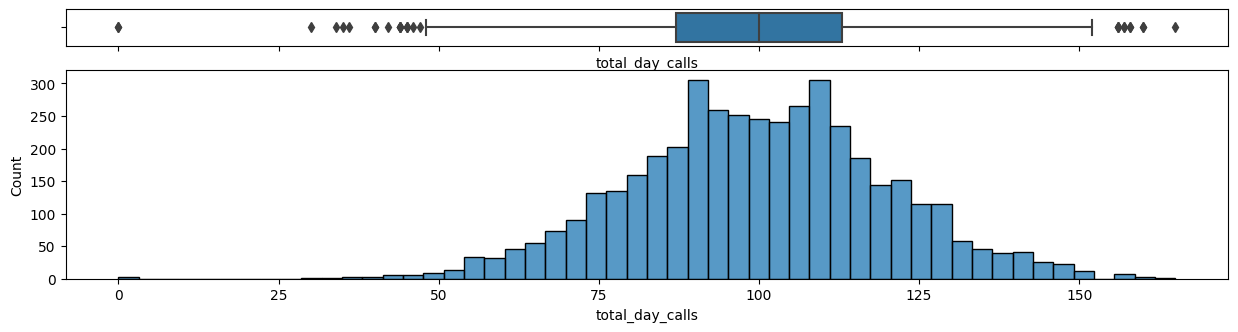

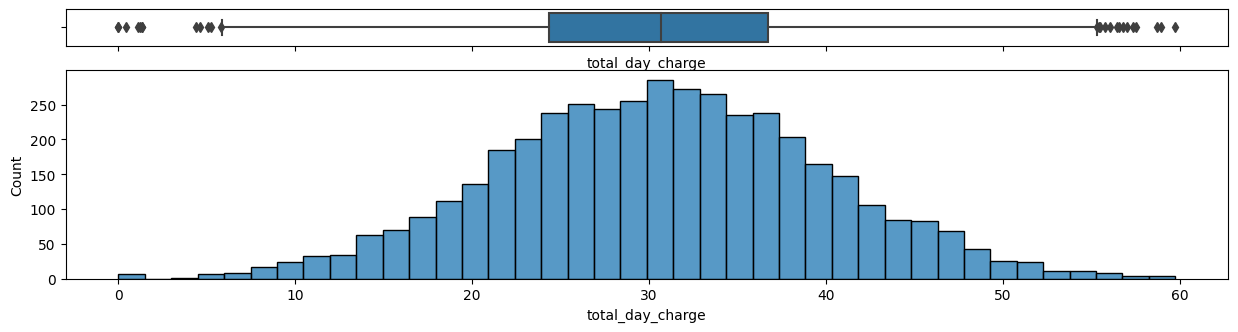

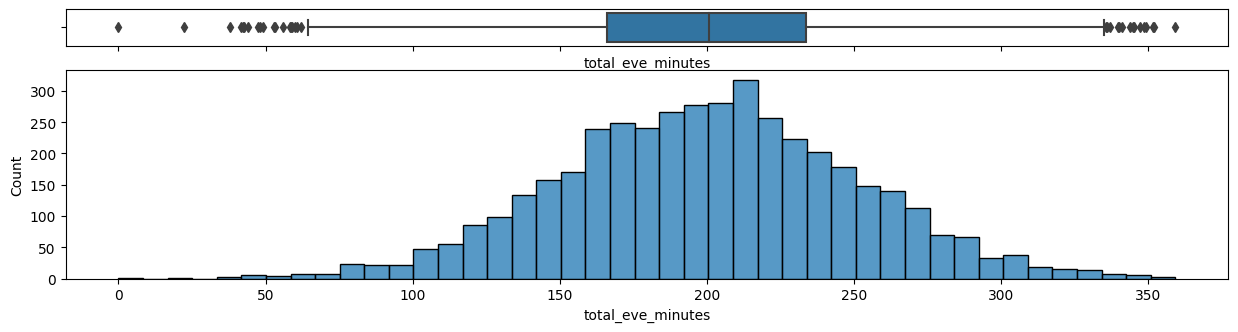

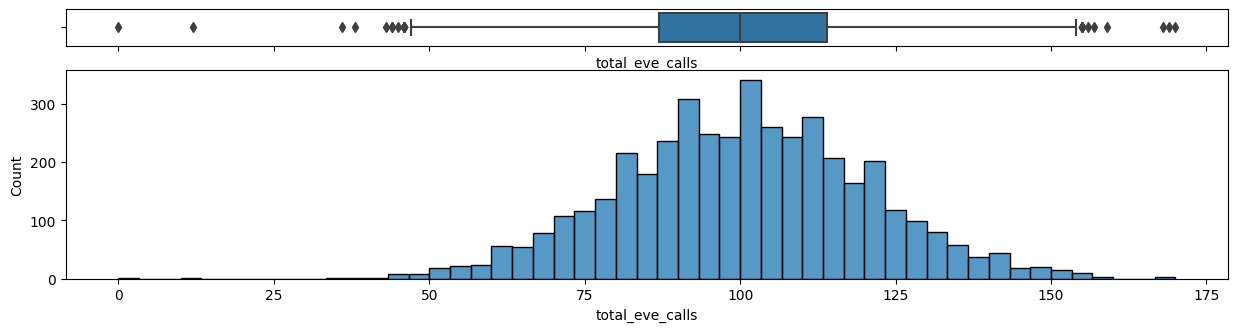

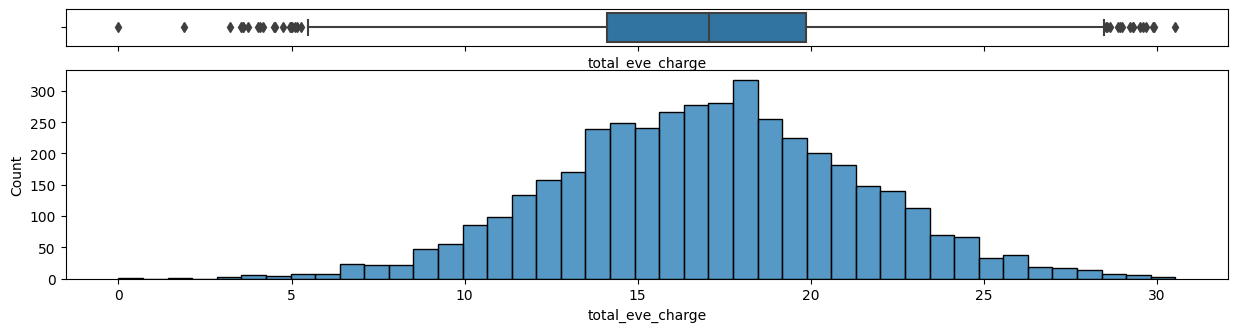

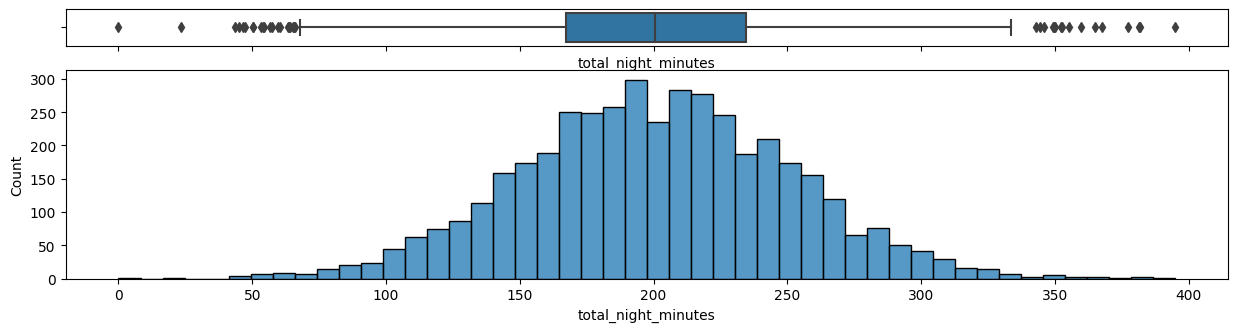

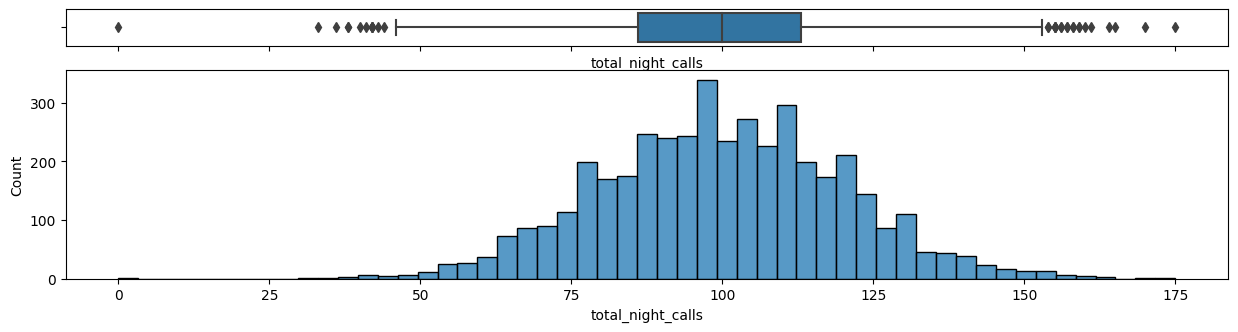

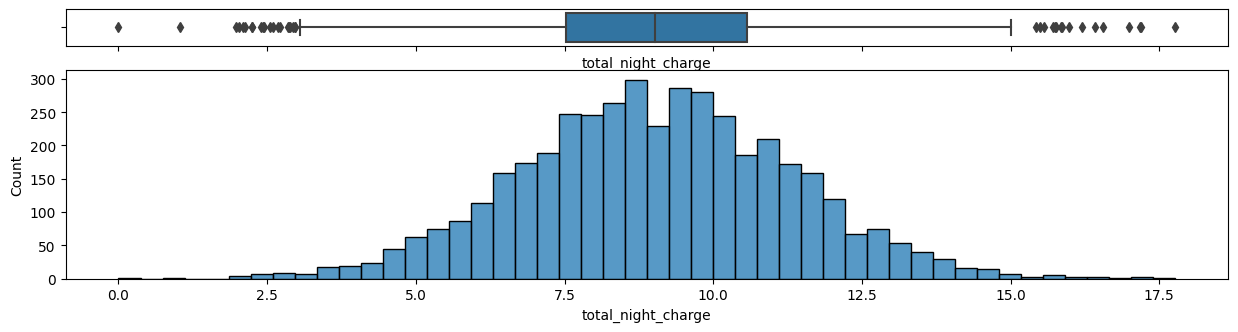

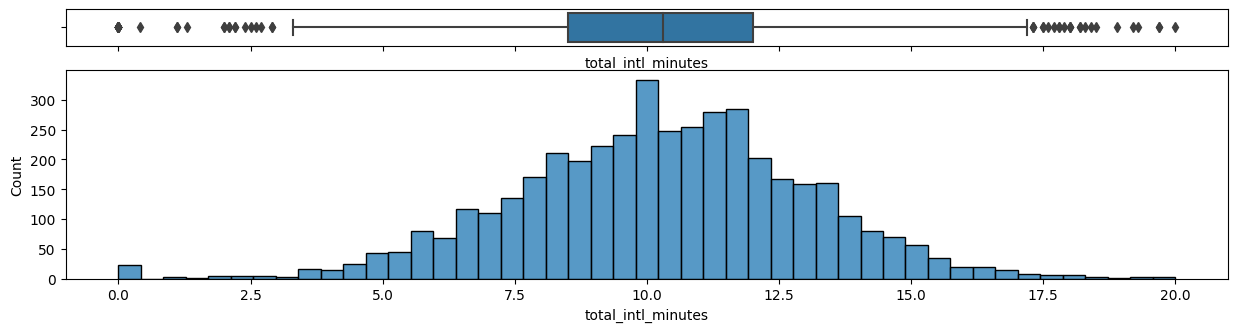

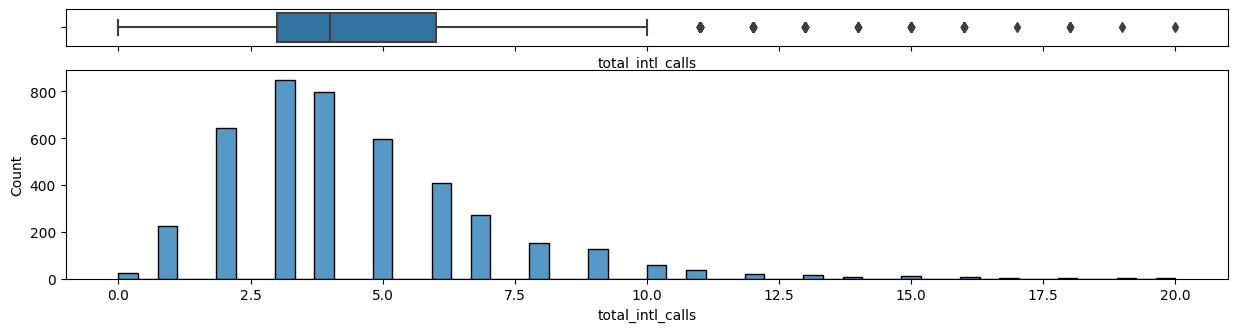

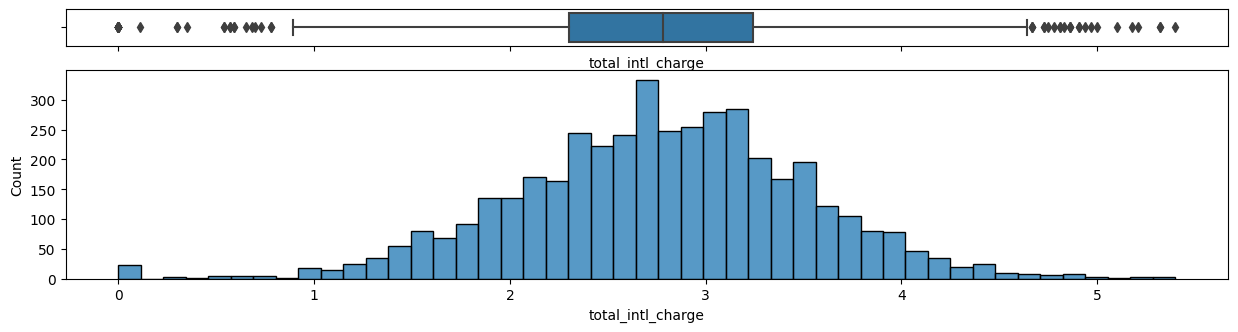

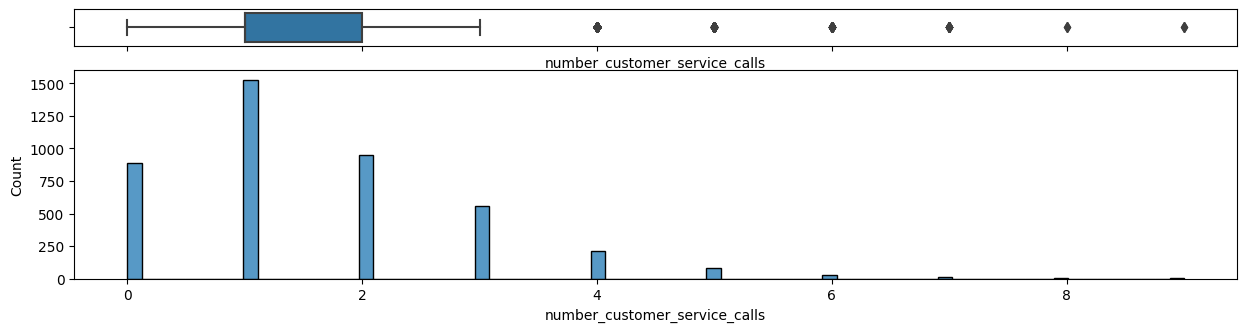

In [ ]:
for num_col in Num_Cols:
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
  f.set_figheight(3.5)
  f.set_figwidth(15)
  sns.boxplot(data=data, x=num_col, ax=ax_box)
  sns.histplot(data=data, x=num_col, ax=ax_hist)
  plt.show()

>**Nhận Xét**:
* Tất cả các numerical colums đều có Outlier.

##### **2.2 Extract Outlier**

In [ ]:
# Extract ra các outlier của từng column.

In [ ]:
def IQR_OutlierDetector(data, onefeature, ConfParm = 1.5):
  col = onefeature
  datavalues = data[onefeature]
  Q1 = np.quantile(datavalues, 0.25)
  Q3 = np.quantile(datavalues, 0.75)
  IQR = Q3-Q1
  upper_bound = Q3+ConfParm*IQR
  lower_bound = Q1-ConfParm*IQR

  LowerOutlierData = [(idx, val) for idx, val in datavalues.items() if val < lower_bound]
  UpperOutlierData = [(idx, val) for idx, val in datavalues.items() if val > upper_bound]
  return LowerOutlierData, UpperOutlierData, [lower_bound, upper_bound]

In [ ]:
def IQR_OutlierAnalysis(data, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target):
  datavalues = data[onefeature]
  print(f'Lower Outlier Data: {len(LowerOutlierData)}')
  print(LowerOutlierData)
  TargetLowerOutlierData = [data.loc[idx, target] for idx, val in LowerOutlierData]
  print(TargetLowerOutlierData)

  print(f'Upper Outlier Data: {len(UpperOutlierData)}')
  print(UpperOutlierData)
  TargetUpperOutlierData = [data.loc[idx, target] for idx, val in UpperOutlierData]
  print(TargetUpperOutlierData)

def IQR_OutlierVisualization(data, onefeature):
    datavalues = data[onefeature]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.set_figheight(3.5)
    f.set_figwidth(15)
    sns.boxplot(data = data, x=one_feature, ax=ax_box)
    sns.histplot(data=data, x=onefeature, ax=ax_hist)
    plt.show()

In [ ]:
Num_Cols

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

Lower Outlier Data: 0
[]
[]
Upper Outlier Data: 20
[(197, 215), (256, 209), (343, 224), (684, 243), (877, 217), (1193, 232), (1304, 225), (1472, 225), (1593, 224), (1828, 212), (1923, 210), (1939, 217), (2289, 209), (2725, 221), (2736, 209), (3679, 216), (3711, 222), (3719, 232), (3932, 217), (4079, 222)]
['no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


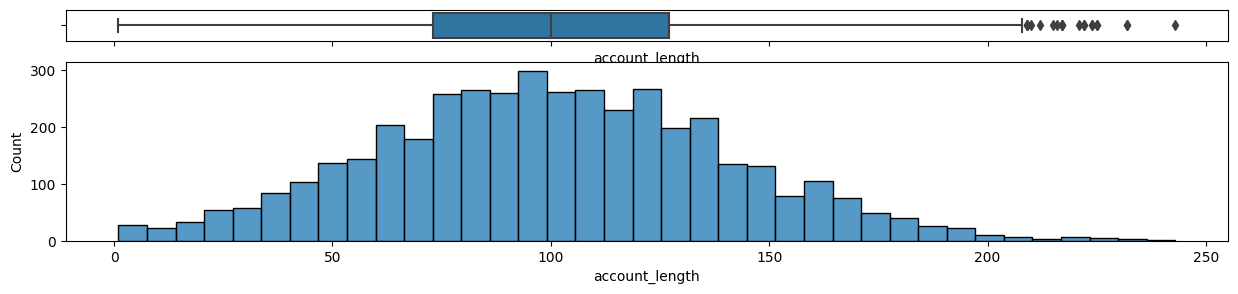

In [ ]:
one_feature = 'account_length'
target = 'churn'
Lower_OutlierData, Upper_OutlierData, confrange = IQR_OutlierDetector(data, one_feature)
IQR_OutlierAnalysis(data, one_feature, Lower_OutlierData, Upper_OutlierData, confrange, target)
IQR_OutlierVisualization(data, one_feature)

### **3. Impute Noise**
* Có thể sử dụng các phương pháp xử lý Missing đã học ở Lesson 1, vì bản chất outlier là các giá trị có thể bị sai. Việc sai và thiếu cơ bản là như nhau nên có thể sử dụng chung 1 phương pháp.
* Trong bài này ta sử dụng 1 cách khác để xử lý Outlier.

>**Impute Noisy (Outlier) dựa trên Target**:
* Xác định target tương ứng của mỗi outlier.
* Thống kê số lượng từng loại của target tương ứng vừa xác định được. Trong phần này là thống kê số lượng `yes`, `no` trong `churn` column.
* Từng outlier có target là `yes` sẽ được thay thế bằng giá trị trung bình của tất cả các outlier có target là `yes`.
* Từng outlier có target là `no` sẽ được thay thế bằng giá trị trung bình của tất cả các outlier có target là `no`.

In [ ]:
def IQR_ImputeNoise(data, onefeature, LowerOutLierData, UpperOutlierData, ConfRange, target):
  TargetDict = {val:np.median(data[data[target]==val][onefeature]) for val in data[target].unique()}

  for idx, val in LowerOutLierData:
    data.loc[idx, onefeature] = TargetDict[data.loc[idx, target]]

  for idx, val in UpperOutlierData:
    data.loc[idx, onefeature] = TargetDict[data.loc[idx, target]]

  return data[onefeature], TargetDict

In [ ]:
target = 'churn'
train = data.copy()
train.index

RangeIndex(start=0, stop=4250, step=1)

[-8.0, 208.0]
Lower Outlier Data: 0
[]
[]
Upper Outlier Data: 20
[(197, 215), (256, 209), (343, 224), (684, 243), (877, 217), (1193, 232), (1304, 225), (1472, 225), (1593, 224), (1828, 212), (1923, 210), (1939, 217), (2289, 209), (2725, 221), (2736, 209), (3679, 216), (3711, 222), (3719, 232), (3932, 217), (4079, 222)]
['no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


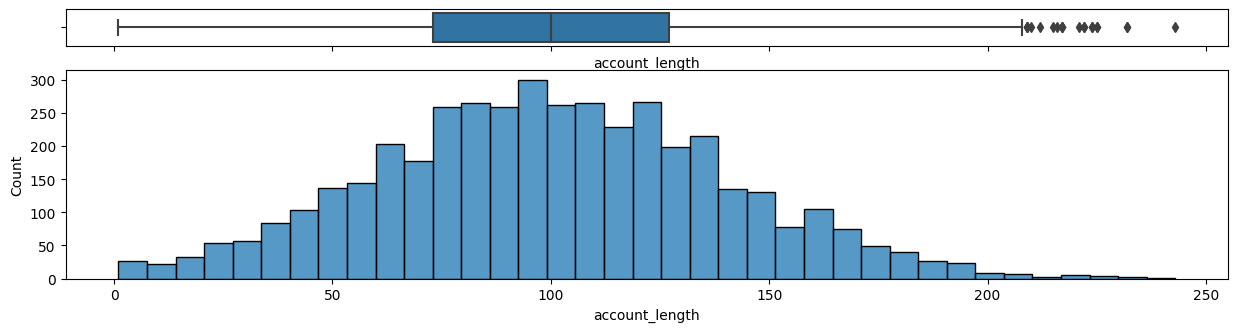

{'no': 99.0, 'yes': 101.0}


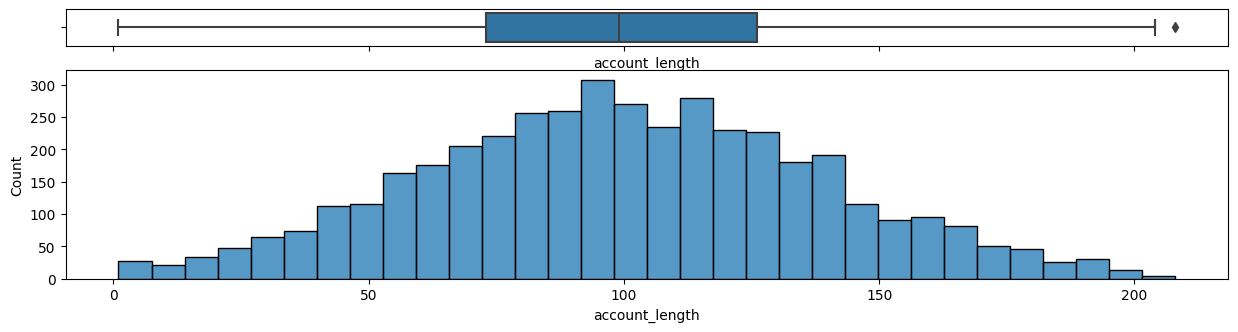

In [ ]:
one_feature = 'account_length'
target = 'churn'

# Noise Impute
datanoise = data.copy()
Lower_OutlierData, Upper_OutlierData, confrange = IQR_OutlierDetector(data, one_feature, ConfParm=1.5)
print(confrange)
IQR_OutlierAnalysis(data, one_feature, Lower_OutlierData, Upper_OutlierData, confrange, target)
IQR_OutlierVisualization(data, one_feature)
datanoise[one_feature], target_dict = IQR_ImputeNoise(datanoise, one_feature, Lower_OutlierData, Upper_OutlierData, confrange, target)
print(target_dict)
train.loc[datanoise.index, one_feature] = datanoise[one_feature]

IQR_OutlierVisualization(train, one_feature)

### **4. Feature Engineering (Feature Extraction or Feature Selection)**

##### **4.1 Hashing Encoding**
Tham khảo thêm tại: https://machinelearningcoban.com/tabml_book/ch_data_processing/hashing.html

In [ ]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [ ]:
one_feature = 'state'
data[one_feature].value_counts()

### **5. Handling the Imbalanced Dataset**

##### **5.1 Upsampling**